In [9]:
DATA_PATH = "E:\shadowfox\phase2\car_pred\data\car.csv"
print("Dataset path:", DATA_PATH)

Dataset path: E:\shadowfox\phase2\car_pred\data\car.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)


In [11]:
df = pd.read_csv(DATA_PATH)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0


In [14]:
df.isnull().sum().sort_values(ascending=False)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
CURRENT_YEAR = 2025

def extract_brand(name):
    return str(name).split()[0]

df['Age'] = CURRENT_YEAR - df['Year']
df['Brand'] = df['Car_Name'].apply(extract_brand)
df['KM_per_Year'] = df['Kms_Driven'] / (df['Age'].replace(0, np.nan) + 1)
df['KM_per_Year'] = df['KM_per_Year'].fillna(df['Kms_Driven'])
df['Price_Depreciation'] = df['Present_Price'] / (df['Age'] + 1)
df['Car_Condition'] = (df['Present_Price'] / (df['Kms_Driven'] + 1)) * (1 / (df['Age'] + 1))
df['Is_Diesel'] = (df['Fuel_Type'].str.lower() == "diesel").astype(int)
df['Is_First_Owner'] = (df['Owner'] == 0).astype(int)

df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Brand,KM_per_Year,Price_Depreciation,Car_Condition,Is_Diesel,Is_First_Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,ritz,2250.000000,0.465833,0.000017,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,sx4,3307.692308,0.733846,0.000017,1,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,ciaz,766.666667,1.094444,0.000159,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,wagon,346.666667,0.276667,0.000053,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,swift,3537.500000,0.572500,0.000013,1,1


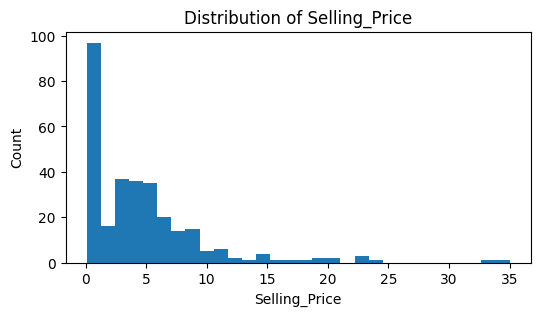

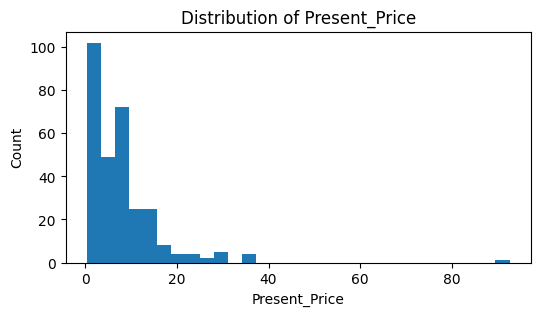

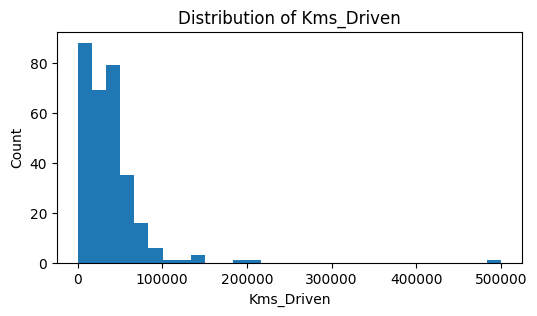

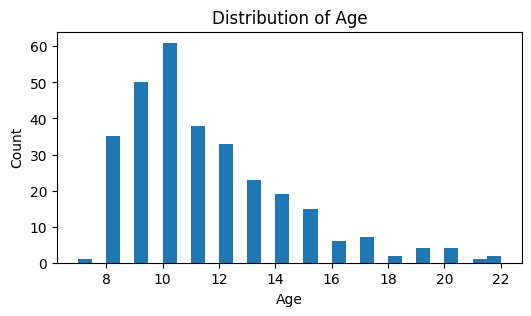

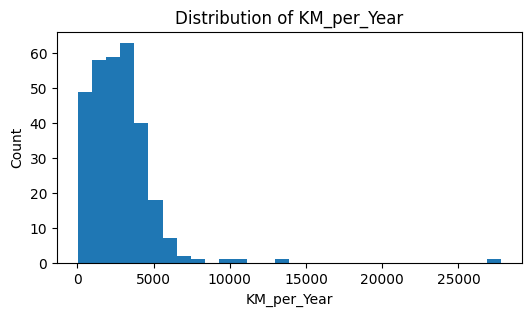

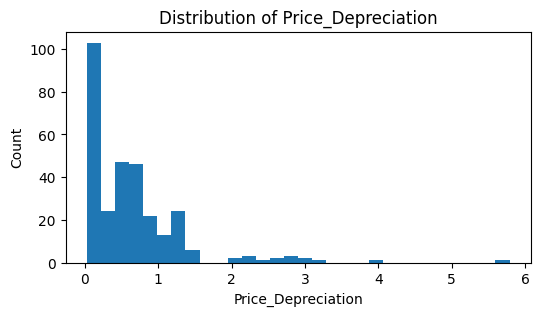

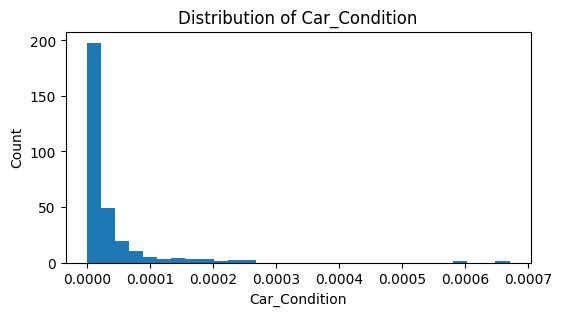

In [16]:
num_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age',
            'KM_per_Year', 'Price_Depreciation', 'Car_Condition']

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 3))
        plt.hist(df[col], bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()


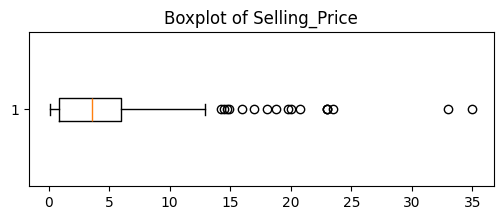

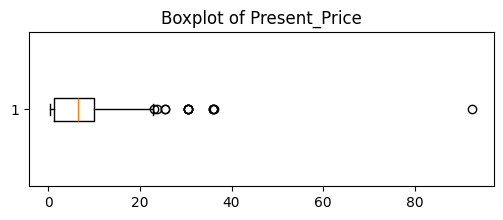

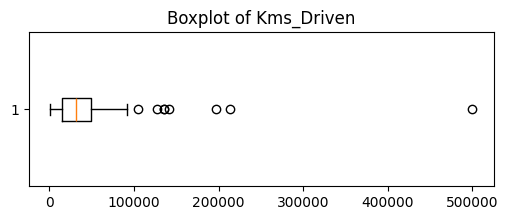

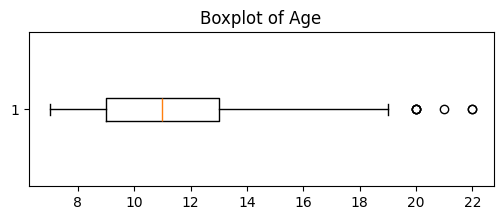

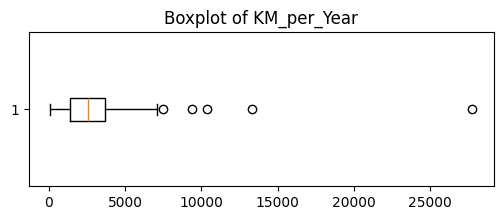

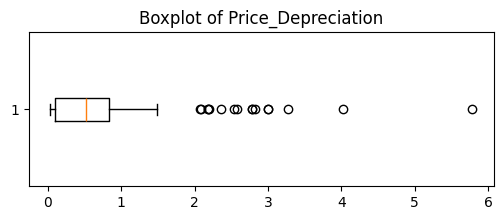

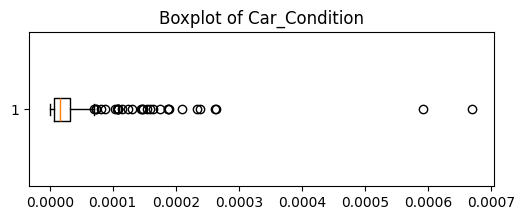

In [17]:
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 2))
        plt.boxplot(df[col], vert=False)
        plt.title(f"Boxplot of {col}")
        plt.show()


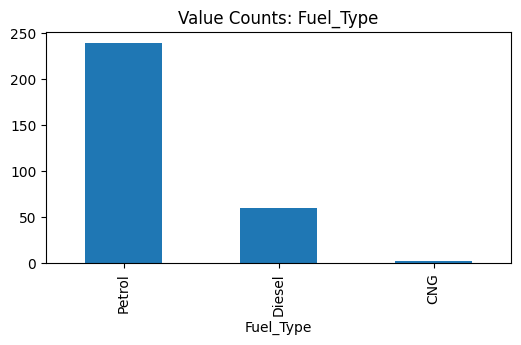

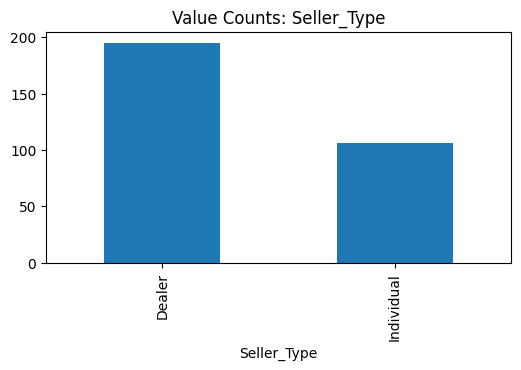

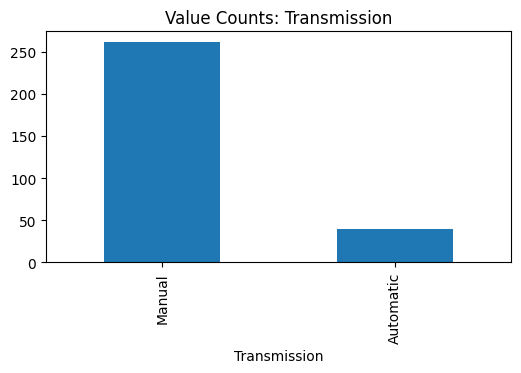

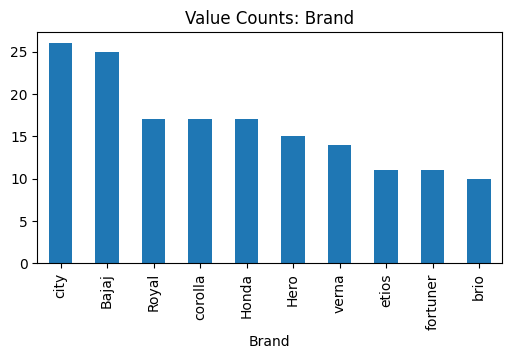

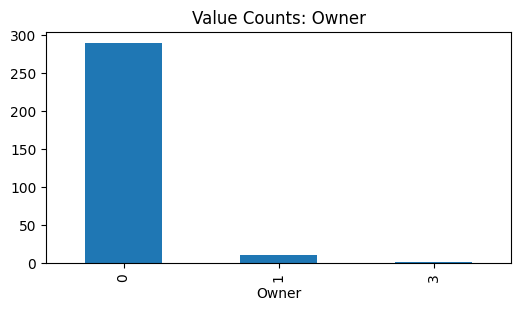

In [18]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Brand', 'Owner']

for col in cat_cols:
    if col in df.columns:
        df[col].value_counts().head(10).plot(kind="bar", figsize=(6,3))
        plt.title(f"Value Counts: {col}")
        plt.show()


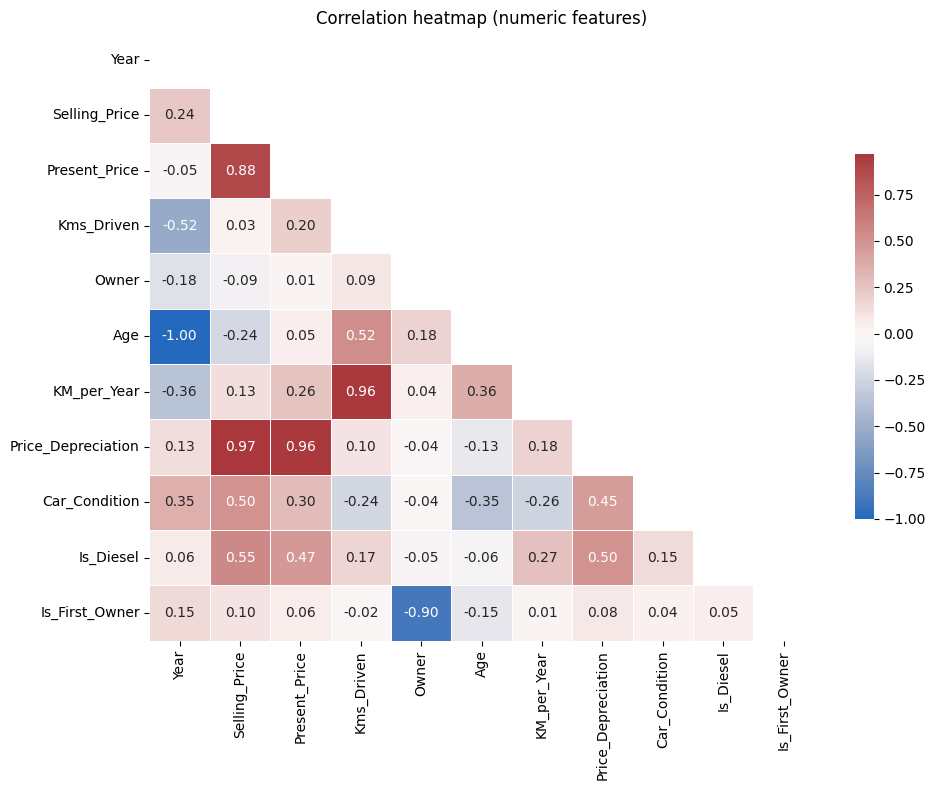

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Age,KM_per_Year,Price_Depreciation,Car_Condition,Is_Diesel,Is_First_Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-1.000000,-0.363410,0.133828,0.354329,0.064315,0.146629
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.125833,0.969655,0.503834,0.552339,0.101445
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.047584,0.256368,0.958109,0.298134,0.473306,0.055443
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.524342,0.961100,0.102855,-0.242840,0.172515,-0.021857
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.182104,0.040514,-0.039325,-0.038833,-0.053469,-0.895982
Age,-1.000000,-0.236141,0.047584,0.524342,0.182104,1.000000,0.363410,-0.133828,-0.354329,-0.064315,-0.146629
KM_per_Year,-0.363410,0.125833,0.256368,0.961100,0.040514,0.363410,1.000000,0.184473,-0.263744,0.271329,0.013479
Price_Depreciation,0.133828,0.969655,0.958109,0.102855,-0.039325,-0.133828,0.184473,1.000000,0.448004,0.503913,0.079875
Car_Condition,0.354329,0.503834,0.298134,-0.242840,-0.038833,-0.354329,-0.263744,0.448004,1.000000,0.145703,0.037405
Is_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,-0.064315,0.271329,0.503913,0.145703,1.000000,0.052859


In [25]:
# replace the correlation heatmap cell with this safer, clearer version
import seaborn as sns

# ensure numeric conversion and compute corr
num_df = df.select_dtypes(include=[np.number]).copy()
corr = num_df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="vlag", linewidths=.5, cbar_kws={"shrink": .6})
plt.title("Correlation heatmap (numeric features)")
plt.tight_layout()
plt.show()
corr

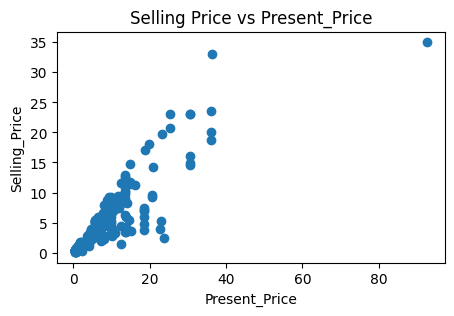

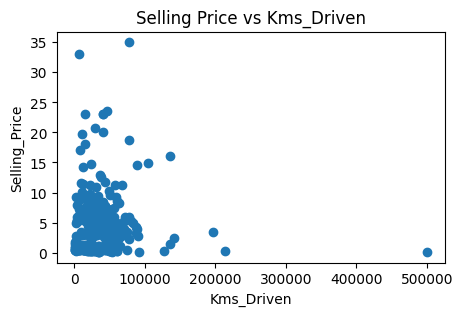

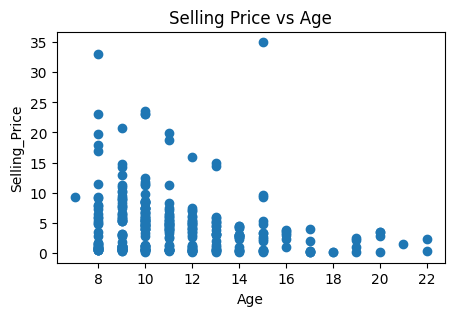

In [27]:
for col in ["Present_Price", "Kms_Driven", "Age"]:
    plt.figure(figsize=(5, 3))
    plt.scatter(df[col], df["Selling_Price"])
    plt.xlabel(col)
    plt.ylabel("Selling_Price")
    plt.title(f"Selling Price vs {col}")
    plt.show()


In [28]:
group_cols = ["Fuel_Type", "Seller_Type", "Transmission", "Brand"]

for col in group_cols:
    if col in df.columns:
        med = df.groupby(col)['Selling_Price'].median().sort_values(ascending=False)
        print(f"\nMedian Selling Price by: {col}")
        display(med.head(10))



Median Selling Price by: Fuel_Type


Fuel_Type
Diesel    7.75
CNG       3.10
Petrol    2.65
Name: Selling_Price, dtype: float64


Median Selling Price by: Seller_Type


Seller_Type
Dealer        5.250
Individual    0.515
Name: Selling_Price, dtype: float64


Median Selling Price by: Transmission


Transmission
Automatic    5.80
Manual       3.25
Name: Selling_Price, dtype: float64


Median Selling Price by: Brand


Brand
land        35.000
fortuner    18.750
innova      12.500
elantra     11.600
creta       11.250
vitara       9.250
city         8.375
ciaz         7.450
ertiga       6.675
s            6.500
Name: Selling_Price, dtype: float64

In [31]:
for col in ["Kms_Driven", "Present_Price", "Selling_Price"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers (lower={lower}, upper={upper})")


Kms_Driven: 8 outliers (lower=-35650.5, upper=99417.5)
Present_Price: 14 outliers (lower=-11.850000000000001, upper=22.950000000000003)
Selling_Price: 17 outliers (lower=-6.749999999999999, upper=13.649999999999999)


In [26]:
OUT_PATH = "E:\\shadowfox\\phase2\\car_pred\\processed\\car_processed_sample.csv"
df.to_csv(OUT_PATH, index=False)
print("Saved processed sample to:", OUT_PATH)


Saved processed sample to: E:\shadowfox\phase2\car_pred\processed\car_processed_sample.csv
